# Redes Complexas: uma introdução (parte 2)

In [1]:
# import da biblioteca networkx
import networkx as nx

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# import pandas
import pandas as pd

## Medidas de centralidade

As **métricas de centralidade** fazem parte de um grupo de métricas de redes chamadas métricas locais, que descrevem características individuais dos nós.

Considere um grafo $G =(V, E)$ onde $|V| = n$, $|E| = m$.

In [2]:
# grafo karate club
KCG = nx.karate_club_graph()

In [3]:
# imprime uma lista com os nós de g (karate club)
nodes_ = KCG.nodes()
print(f'nodes: {nodes_}')

# imprime uma lista com as arestas de g (karate club)
edges_ = KCG.edges()
print(f'arestas: {edges_}')

nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
arestas: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [4]:
n = nx.number_of_nodes(KCG) # número de nos
m = nx.number_of_edges(KCG) # número de arestas

print(f"numero de nos: {n}")
print(f"numero de arestas: {m}")

numero de nos: 34
numero de arestas: 78


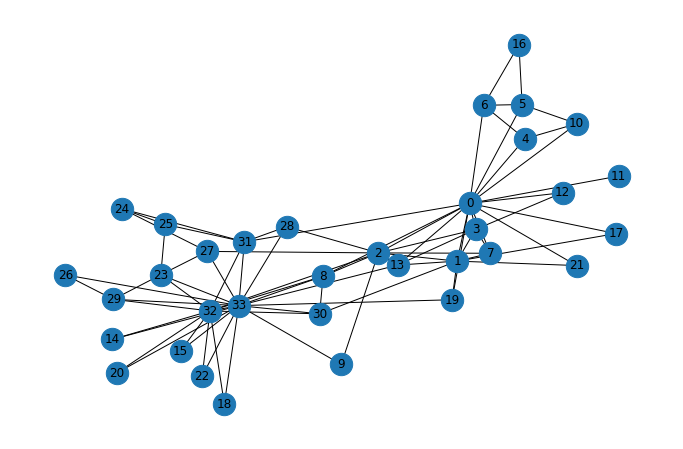

In [5]:
# grafico da grafo

fig, ax = plt.subplots(figsize=(12,8))

# imprime o grafo
nx.draw(KCG, node_size=500, with_labels = True)

plt.show()

In [6]:
# verifica se o grafo é conexo
print(nx.is_connected(KCG))

True


### Grau de centralidade

- A métrica de **grau** refere-se ao número de links de cada nó da rede. 

- **nx.degree()**: função do networkx que retorna o grau cada nó da rede.

- A métrica de **grau de centralidade** atribui uma pontuação(fração) de importância com base no número de links mantido por cada nó.

- A métrica **grau de centralidade** do nó $i$ é dado pela fórmula $\dfrac{grau(i)}{|V|}$ para cada $i \in V$.

- Essa métrica nos fala o quanto direto é a conexão de um nó com os outros nós da rede.

- **nx.degree_centrality()**: função do networkx que retorna o grau de centralidade de cada nó da rede.

In [7]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(KCG))
val_grau = dic_grau.values()

In [8]:
set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

# imprime o grau dos nodes
#for key, value in dic_grau.items():
#    print(f"grau do no{key} : {value}")

Grau = {1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17}
1 : 11, 
2 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
3 : 4, 10, 19, 24, 25, 28, 
4 : 5, 6, 7, 27, 29, 30, 
5 : 8, 13, 23, 
6 : 3, 31, 
9 : 1, 
10 : 2, 
12 : 32, 
16 : 0, 
17 : 33, 


In [9]:
# rank em relacao ao grau

ranks = [(k, v) for k, v in sorted(dic_grau.items(), key=lambda item: -item[1])]

# os k melhores
k = 5
ranks[0:k]

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

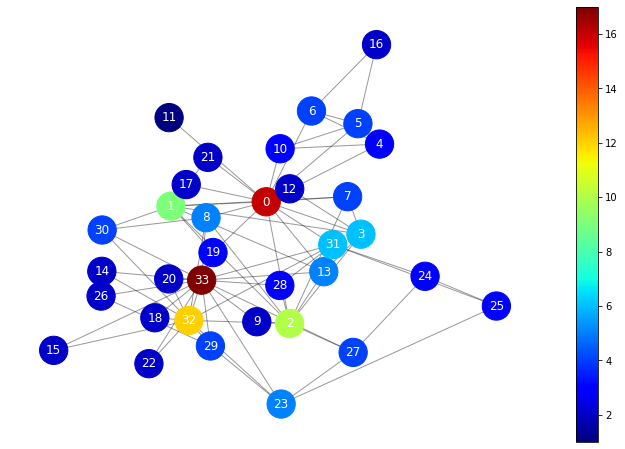

In [10]:
# grafico com graus

fig, ax = plt.subplots(1,1,figsize=(12,8))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# define a cor do nos
color = list(dic_grau.values())

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [11]:
# grau de centralidade dos nodes da rede

dic_grau_center = nx.degree_centrality(KCG)
val_grau_center = dic_grau_center.values()

#set_grau_center = set(dic_grau_center.values())

#print(f"Grau_center: {set_grau_center}")

#for i in set_grau_center:
#    print(i, end= " : ")
#    for key, value in dic_grau_center.items():
#        if i == dic_grau_center[key]:
#            print(key, end=", ")
#    print()

In [12]:
# rank em relacao a centralidade de grau

ranks = [(k, v) for k, v in sorted(dic_grau_center.items(), key=lambda item: -item[1])]

# os k melhores
k = 5
ranks[0:k]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727)]

In [13]:
# imprime grau de centralidade de cada node

#for key, value in grau_center.items():
#    print(f"grau de centralidade do no {key} : {value}")

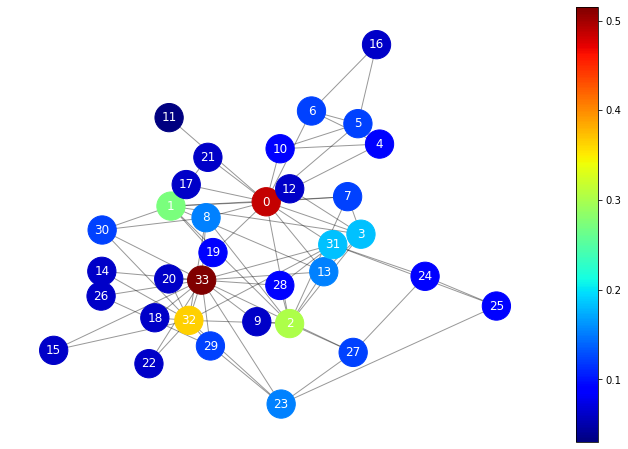

In [14]:
# grau de centralidade

fig, ax = plt.subplots(1,1,figsize=(12,8))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_grau_center)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

## Métricas geométricas

- Seja $G_i = (V_i,E_i)$ uma componente conexa de $G$ que contém o nó $i \in V$

- A **excentricidade** do nó $i \in G_i$ é a maior distância geodésica de um $i$ aos demais nós de $G_i$.
$$
ec(i) = \max_{j \in V_i} sp(i,j) \; \forall \; i \in V_i
$$
onde $sp(i,j)$ é o tamanho da distância geodésica do nó $i$ para o nó $j \in V_i$.

- A **centralidade de excentricidade** do nó $i$ é dado pela reciproca da sua excentricidade
$$
cec(i) = \frac{1}{ec(i)} \; \forall \; i \in V_i
$$



In [15]:
# calculo da excentricidade

dic_ec  = nx.eccentricity(KCG)
val_ec  = list(dic_ec.values())

set_ec = set(dic_ec.values())
print(f"EC = {set_ec}")

for i in set_ec:
    print(i, end= " : ")
    for key, value in dic_ec.items():
        if i == dic_ec[key]:
            print(key, end=", ")
    print()

EC = {3, 4, 5}
3 : 0, 1, 2, 3, 8, 13, 19, 31, 
4 : 4, 5, 6, 7, 9, 10, 11, 12, 17, 21, 24, 25, 27, 28, 30, 32, 33, 
5 : 14, 15, 16, 18, 20, 22, 23, 26, 29, 


In [16]:
#dic_cec = {}
#for key, value in dic_ec.items():
#    print(f"excentricidade do no {key} : {value}")

In [17]:
# rank em relacao a excentricidade

ranks = [(k, v) for k, v in sorted(dic_ec.items(), key=lambda item: -item[1])]

# os k melhores
k = 5
ranks[0:k]

[(14, 5), (15, 5), (16, 5), (18, 5), (20, 5)]

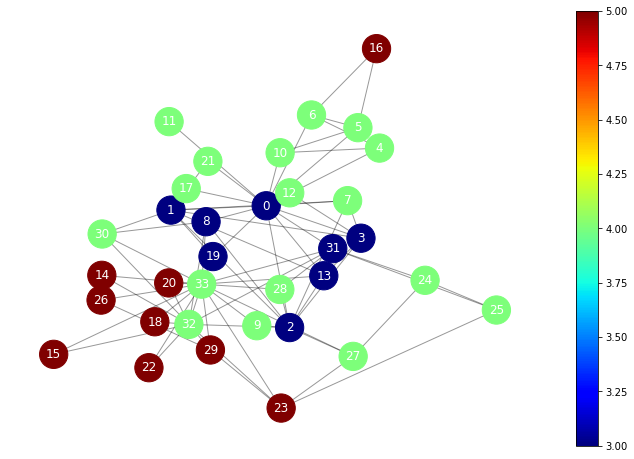

In [18]:
# grafico da excentricidade

fig, ax = plt.subplots(1,1,figsize=(12,8))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_ec)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [19]:
# calculo da centralidade de excentricidade

dic_cec = {}
for key, value in dic_ec.items():
    dic_cec[key] = 1.0/value

val_cec = list(dic_cec.values())

In [20]:
set_cec = set(dic_cec.values())
print(f"CEC = {set_cec}")

for i in set_cec:
    print(i, end= " : ")
    for key, value in dic_cec.items():
        if i == dic_cec[key]:
            print(key, end=", ")
    print()

CEC = {0.3333333333333333, 0.25, 0.2}
0.3333333333333333 : 0, 1, 2, 3, 8, 13, 19, 31, 
0.25 : 4, 5, 6, 7, 9, 10, 11, 12, 17, 21, 24, 25, 27, 28, 30, 32, 33, 
0.2 : 14, 15, 16, 18, 20, 22, 23, 26, 29, 


In [21]:
# rank em relacao a centralidade de excentricidade

ranks = [(k, v) for k, v in sorted(dic_cec.items(), key=lambda item: -item[1])]

# os k melhores
k = 5
ranks[0:k]

[(0, 0.3333333333333333),
 (1, 0.3333333333333333),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333)]

In [22]:
# imprime a centralidade de excentricidade

#for key, value in dic_cec.items():
#    print(f"centralidade de excentricidade do no {key} : {value}")

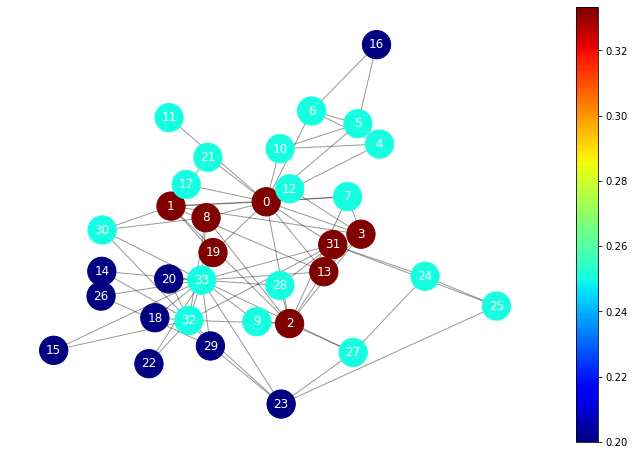

In [23]:
# grafico da centralidade de excentricidade

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cec)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

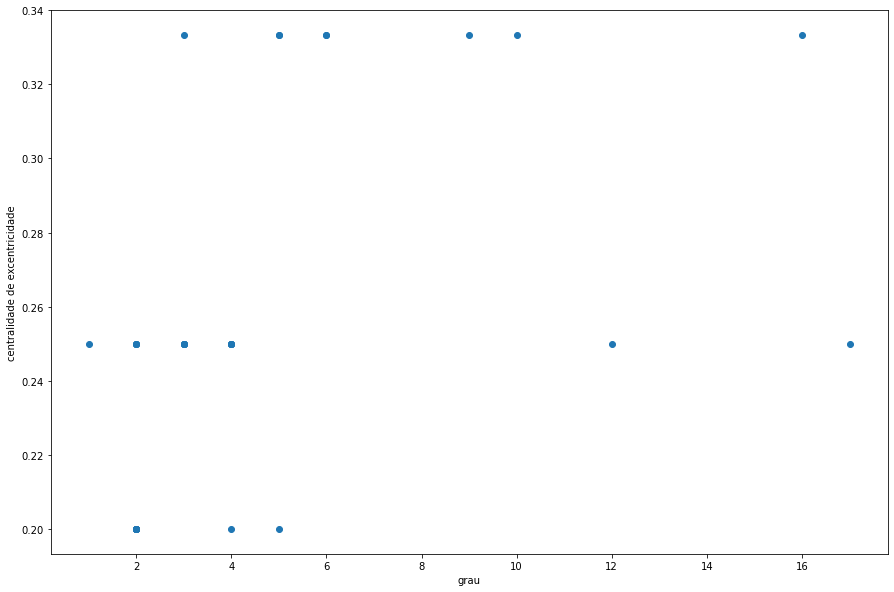

In [24]:
# grau x centralidade de excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.plot(val_grau, val_cec, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de excentricidade')
plt.show()

### Centralidade de proximidade

- A **centralidade de proximidade** pontua cada nó com base em sua **proximidade** com todos os outros nós da rede.

- Esta medida calcula os caminhos mais curtos entre todos os nós e, em seguida, atribui a cada nó uma pontuação com base na soma dos caminhos mais curtos.

- Podemos usar essa medida para encontrar os nós que estão em melhor posição para influenciar toda a rede mais rapidamente.

- A **centralidade de proximidade** do nó $i$ é igual ao reciproco da média aritmética das distâncias geodésicas do nó $i$ para os demais nós $j$ da mesma componente do nó $i$, ou seja
$$
C_{c}(i) = \dfrac{|V_i| - 1}{\sum_{j \in {V_i - \{i\}}} sp(i,j)} \; \forall \; i \in V_i
$$

- **nx.closeness_centrality()**: função do networkx que retorna a centralidade de proximidade de cada nó da rede.

In [25]:
# calculo da centralidade de proximidade

dic_cc  = nx.closeness_centrality(KCG)
val_cc  = list(dic_cc.values())

#set_cc = set(val_cc)
#print(f"CEC = {set_cc}")

#for i in set_cc:
#    print(i, end= " : ")
#    for key, value in dic_cc.items():
#        if i == dic_cc[key]:
#            print(key, end=", ")
#    print()

In [26]:
# rank em relacao a centralidade de proximidade

ranks = [(k, v) for k, v in sorted(dic_cc.items(), key=lambda item: -item[1])]

# os k melhores
k = 5
ranks[0:k]

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625)]

In [27]:
# imprime a centralidade de proximidade

#for key, value in dic_cc.items():
#    print(f"centralidade de proximidade do v{key} : {value}")

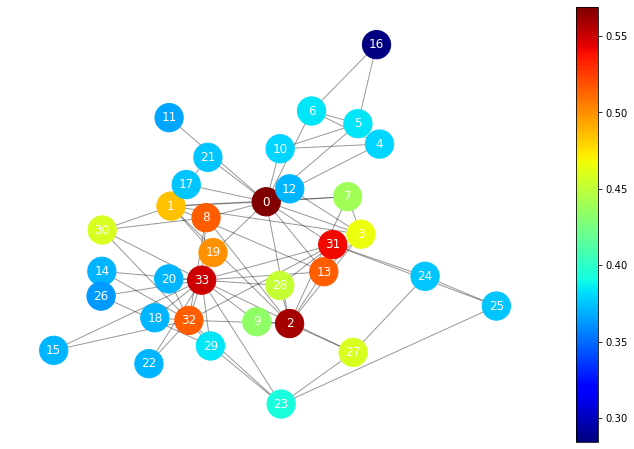

In [28]:
# grafico da centralidade de proximidade

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cc)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

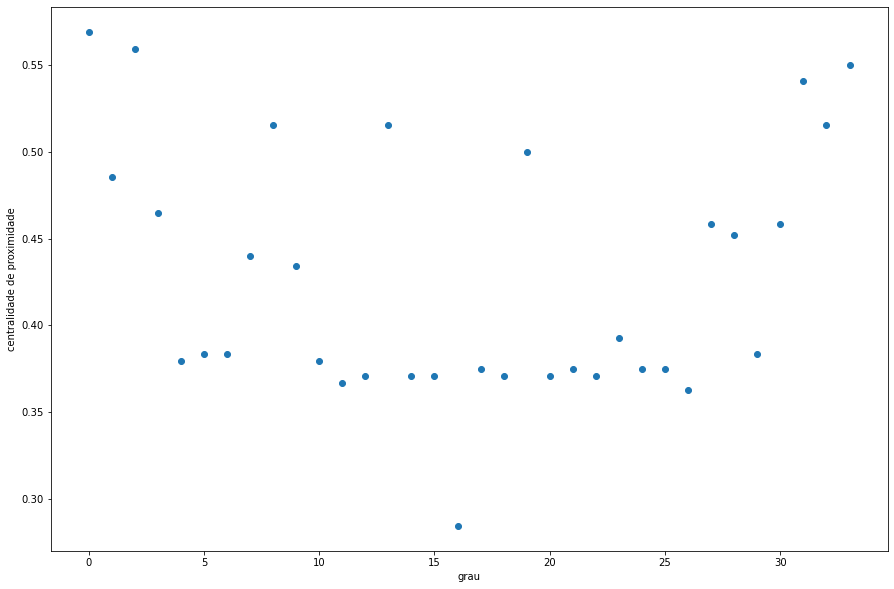

In [29]:
# grau x centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.plot(nodes_, val_cc, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de proximidade')
plt.show()

### Centralidade harmônica

- Na **centralidade harmônica** a média aritmética das distâncias presente na **centralidade de proximidade** é substituida pela **média harmônica** das mesmas em que nós pertencentes a componentes distintas possuem distâncias infinitas entre si, ou seja,
$$
C_h(i) = \dfrac{1}{n-1} \left[ \sum_{j\not=i} \dfrac{1}{sp(i,j)} \right] \; \forall \; i \in V
$$

- **nx.harmonic_centrality()**: função do networkx que retorna o centralidade harmônica de cada nó da rede, sem normalizar(sem dividor por $n-1$).

- A **centralidade harmônica** contorna o problema de redes com mais de uma componente conexas, onde temos distâncias geodésicas infinitas.

In [30]:
# calculo da centralidade harmonica

dic_chu = nx.harmonic_centrality(KCG)
val_chu = list(nx.harmonic_centrality(KCG).values())

set_chu = set(val_chu)
print(f"CHU = {len(set_chu)}")

for i in set_chu:
    print(i, end= " : ")
    for key, value in dic_chu.items():
        if i == dic_chu[key]:
            print(key, end=", ")
    print()


# imprime a centralidade harmonica
#for key, value in dic_chu.items():
#    print(f"centralidade harmonica do v{key} : {value}")

CHU = 26
11.099999999999996 : 16, 
13.916666666666666 : 24, 
13.916666666666664 : 25, 
13.950000000000001 : 26, 
14.200000000000003 : 14, 15, 18, 20, 22, 
14.16666666666667 : 17, 21, 
13.500000000000004 : 11, 
14.66666666666667 : 4, 10, 
15.16666666666667 : 5, 6, 
16.41666666666667 : 7, 
17.66666666666667 : 3, 
18.5 : 8, 13, 
19.16666666666667 : 1, 
21.0 : 2, 
23.16666666666666 : 0, 
19.333333333333336 : 31, 
20.916666666666668 : 32, 
23.25 : 33, 
14.000000000000004 : 12, 
15.583333333333334 : 9, 
15.366666666666669 : 29, 
16.033333333333335 : 23, 
16.916666666666664 : 27, 
16.416666666666664 : 28, 
16.916666666666668 : 30, 
17.5 : 19, 


In [31]:
# rank em relacao a centralidade harmonica

ranks = [(k, v) for k, v in sorted(dic_chu.items(), key=lambda item: -item[1])]

# os k melhores
k = 14
ranks[0:k]

[(33, 23.25),
 (0, 23.16666666666666),
 (2, 21.0),
 (32, 20.916666666666668),
 (31, 19.333333333333336),
 (1, 19.16666666666667),
 (8, 18.5),
 (13, 18.5),
 (3, 17.66666666666667),
 (19, 17.5),
 (30, 16.916666666666668),
 (27, 16.916666666666664),
 (7, 16.41666666666667),
 (28, 16.416666666666664)]

In [32]:
# centraliade harmonica normalizada

#chn = [x/(len(val_chu)-1) for x in val_chu]  # normalização

# normalizacao
dic_chn = {}
for key, value in dic_chu.items():
    dic_chn[key] = value/(n-1)
    #dic_chn[key] = chn[key]

val_chn = list(dic_chn.values())

#set_chn = set(val_chn)
#print(f"CHN = {len(set_chn)}")

#for i in set_chn:
#    print(i, end= " : ")
#    for key, value in dic_chn.items():
#        if i == dic_chn[key]:
#            print(key, end=", ")
#    print()

#for key, value in dic_chn.items():
#    print(f"centralidade harmonica normalizada do v{key} : {value}")

In [33]:
# rank em relacao a centralidade harmonica normalizada

ranks = [(k, v) for k, v in sorted(dic_chn.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.7045454545454546),
 (0, 0.7020202020202019),
 (2, 0.6363636363636364),
 (32, 0.6338383838383839),
 (31, 0.585858585858586),
 (1, 0.580808080808081),
 (8, 0.5606060606060606),
 (13, 0.5606060606060606),
 (3, 0.5353535353535355),
 (19, 0.5303030303030303)]

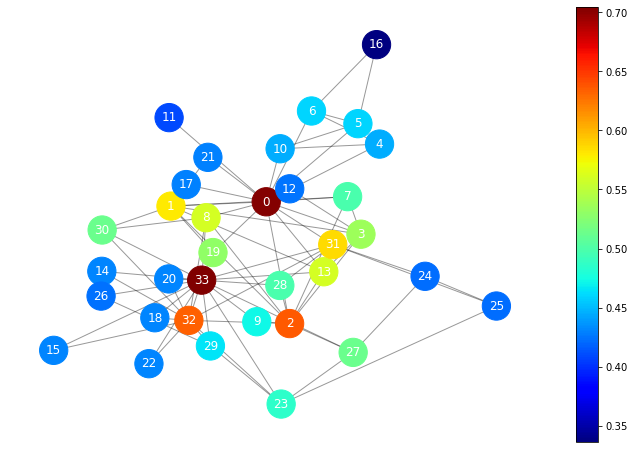

In [34]:
# gráfico da centralidade harmonica

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = val_chn

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

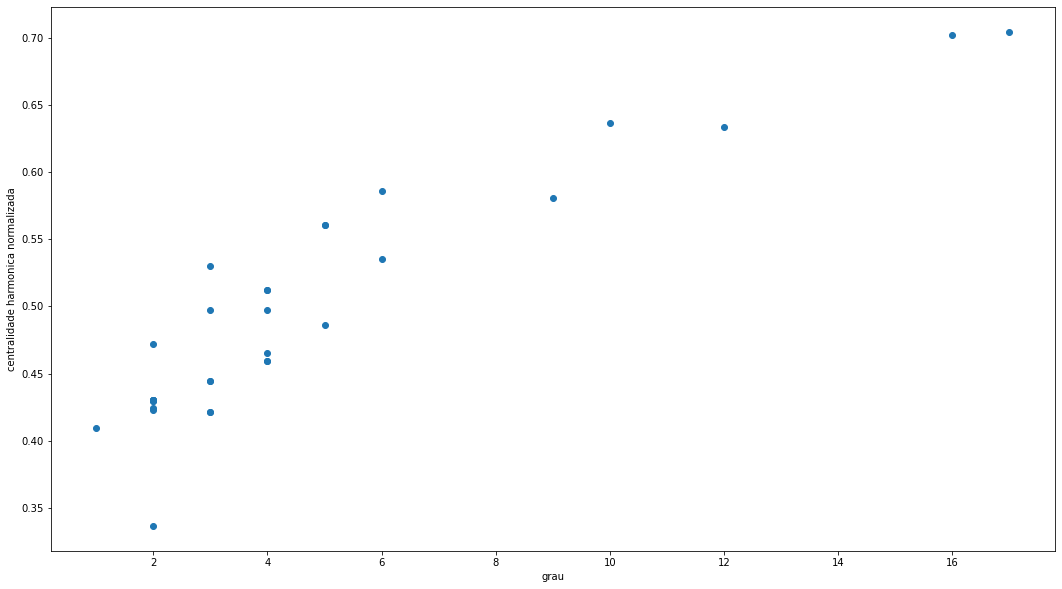

In [35]:
# grau x centralidade harmonica normalizada

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_chn , 'o')
plt.xlabel('grau')
plt.ylabel('centralidade harmonica normalizada')
plt.show()


### Centralidade de intermediação

- A **centralidade de intermediação** quantifica o quanto os vértices são capazes de atuar como intermediários entre outros dois vértices, podendo portanto controlar o fluxo de informação entre eles.

- $Q_{j,k}$: número de caminhos geodésicos iniciando no vértice $j$ e terminando no vértice $k$.

- $Q_{j,k}(i)$: número de caminhos geodésicos que iniciam em $j$, terminam em $k$ e passam pelo vértice $i$.

- $\dfrac{Q_{j,k}(i)}{Q_{j,k}}$: determina a importância do vértice $i$ para a conexão entre $j$ e $k$. Quanto maior valor, maior é a importância do vértice $i$ para a conexão entre $j$ e $k$.

- Fórmula da centralidade por intermediação

$$
C_{b}(i) = \dfrac{1}{(n-1)(n-2)} \left[ \sum_{(j,k):j\not=k, i \not\in \{ j,k\}} \dfrac{Q_{j,k}(i)}{Q_{j,k}} \right] \; \forall \; i \in V
$$

- Função do networkx: **nx.betweenness_centrality()**

In [41]:
# calculo da centralidade de intermediação 

dic_cb = nx.betweenness_centrality(KCG, normalized=True)
val_cb = list(dic_cb.values())

#set_cb = set(dic_cb.values())
#print("set_cb: ", set_cb)

#for i in set_cb:
#    print(i, end= " : ")
#    for key, value in dic_cb.items():
#        if i == dic_cb[key]:
#            print(key, end=", ")
#    print()

#for key, value in dic_cb.items():
#    print(f"centralidade de intermediação do v{key} : {value}")

In [42]:
# rank em relacao a centralidade de autovetor

ranks = [(k, v) for k, v in sorted(dic_cb.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

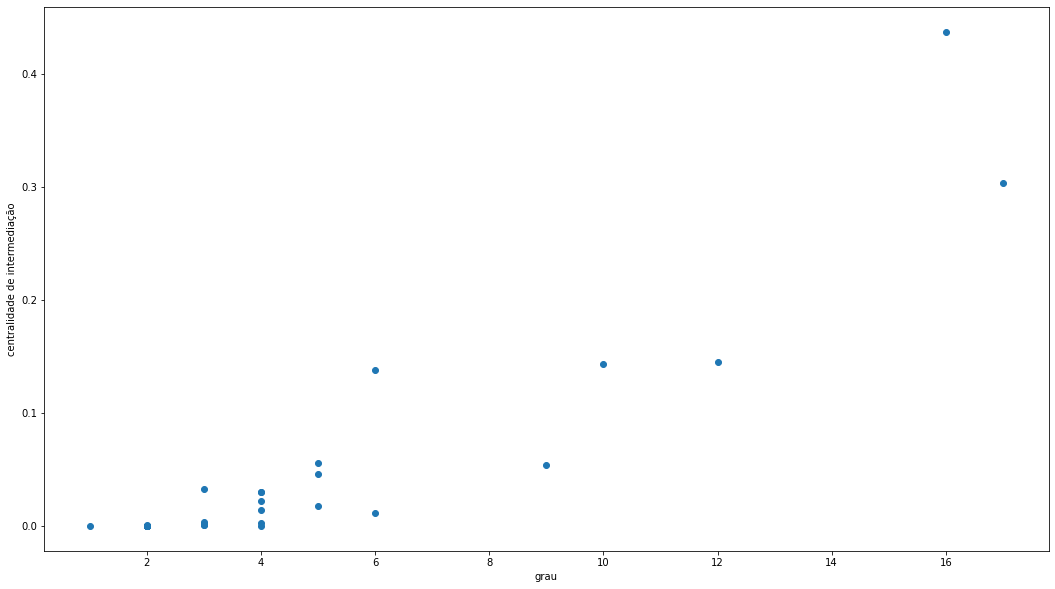

In [43]:
# grau x centralidade de intermediacao

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_cb, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de intermediação')
plt.show()

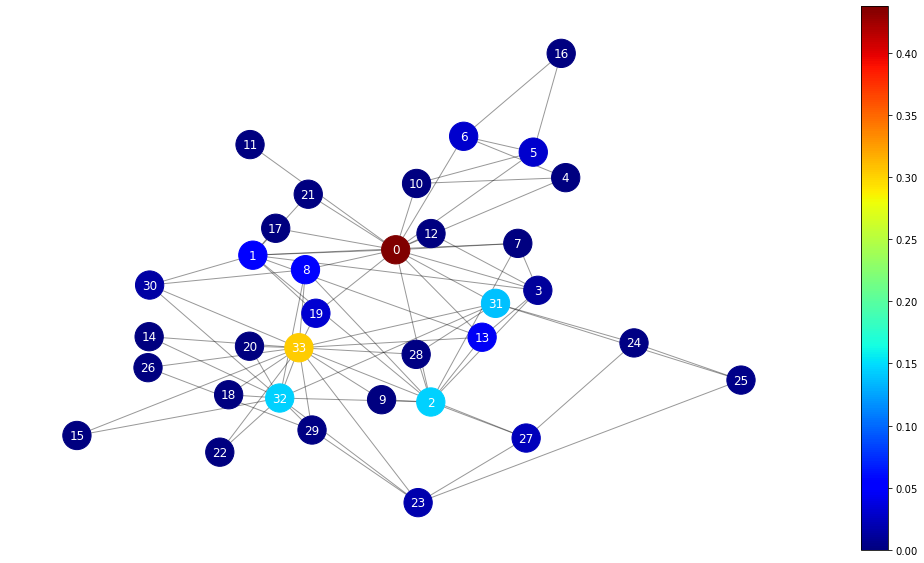

In [44]:
# gráfico da centralidade de intermediação 

G = KCG

fig, ax = plt.subplots(1,1,figsize=(18,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cb)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()